In [1]:

from io import StringIO
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_f34eb69ce46f45f6bb1d81aa6fd77e13(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_3144209d6fbaea80f34b8f375a1a147239ad7e35','domain': {'id': '0e7257ca947447f082991119deaf3a26'},
            'password': 'SK}b3(PaYbp2pq3,'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_f34eb69ce46f45f6bb1d81aa6fd77e13('DefaultProjectarpitasahasjsuedu', 'thads2013m.csv'))

df_data_1.head()







,﻿Control,SMSA,METRO,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,...,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTSTATUS
0,54288,5000,7,4,2003,1,1,90000,-6,1,...,2 50.1 - 100% FMR,2 50.1 - 100% FMR,6 100 - 120% AMI,7 120% AMI +,7 120% AMI +,6 100 - 120% AMI,4 60 - 80% AMI,.,2 30% to 50%,-5
1,54290,5000,7,2,2003,1,1,-6,-6,2,...,2 50.1 - 100% FMR,2 50.1 - 100% FMR,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,2 30 - 50% AMI,0 Not Assisted,2 30% to 50%,-5
2,54291,5000,7,2,2007,1,1,300000,-6,1,...,3 GT FMR,3 GT FMR,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,.,3 50% or More,-5
3,54295,5000,7,2,2002,1,1,-6,-6,2,...,3 GT FMR,3 GT FMR,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,6 100 - 120% AMI,0 Not Assisted,2 30% to 50%,-5
4,54296,5000,7,4,2003,1,1,300000,-6,1,...,3 GT FMR,3 GT FMR,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,.,1 Less than 30%,-5


In [2]:
#df_data_1['Income_Cat'], df_data_1['Percent_of_AMI'] = zip(*df_data_1['FMTCOST06RELAMICAT'].map(lambda x: x.split(' ')))
df2 = pd.DataFrame(df_data_1['FMTCOST06RELAMICAT'].str.split(' ',1).tolist())
df2.columns = ['Income_Cat', 'Percent_of_AMI']
#df_data_1.head()
df2.head()

,Income_Cat,Percent_of_AMI
0,6,100 - 120% AMI
1,4,60 - 80% AMI
2,7,120% AMI +
3,7,120% AMI +
4,7,120% AMI +


In [3]:
df2['Metro'] = df_data_1['SMSA'].copy()
df2['Age'] = df_data_1['AGE1'].copy()


df2.head()

,Income_Cat,Percent_of_AMI,Metro,Age
0,6,100 - 120% AMI,5000,66
1,4,60 - 80% AMI,5000,39
2,7,120% AMI +,5000,44
3,7,120% AMI +,5000,39
4,7,120% AMI +,5000,40


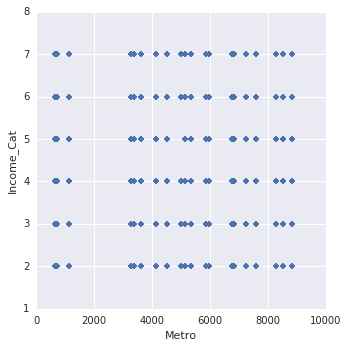

In [4]:
sns.lmplot(x = 'Metro', y = 'Income_Cat', data = df2, fit_reg = False)
plt.show()

In [17]:
df2.groupby("Metro")
df2.head()

,Income_Cat,Percent_of_AMI,Metro,Age
0,6,100 - 120% AMI,5000,66
1,4,60 - 80% AMI,5000,39
2,7,120% AMI +,5000,44
3,7,120% AMI +,5000,39
4,7,120% AMI +,5000,40


In [22]:
#order = df2.sort(['Income_Cat','Percent_of_AMI'], ascending = True)
df3 = df2[(df2.Age >= 30) & (df2.Age <= 40)]
df3 ['Metro'] = df3['Metro'].map({640:'Austin', 720:'Baltimore', 1120:'Boston', 3280:'Hartford', 3360:'Houston', 3600:'Jacksonville', 4120:'Las Vegas', 4520:'Louisville',
                                 5000:'Miami', 5120:'Minneapolis', 5360:'Nashville',5880:'Oklahoma City', 5960:'Orlando', 6760:'Richmond', 6840: 'Rochester',7240:'San Antonio',
                                7600:'Seattle', 8280:'Tampa', 8520:'Tucson', 8840:'Washington DC'}).head()
#df2 ['Metro'] = df2['Metro'].map({640:'Austin', 720:'Baltimore', 1120:'Boston', 3280:'Hartford', 3360:'Houston', 3600:'Jacksonville', 4120:'Las Vegas', 4520:'Louisville',
 #                                5000:'Miami', 5120:'Minneapolis', 5360:'Nashville',5880:'Oklahoma City', 5960:'Orlando', 6760:'Richmond', 6840: 'Rochester',7240:'San Antonio',
  #                               7600:'Seattle', 8280:'Tampa', 8520:'Tucson', 8840:'Washington DC'})
                                 
#g = sns.factorplot(x="Percent_of_AMI", col="Metro",col_wrap = 4,
 #                  data=df2, kind="count", x_order = ['30 - 50% AMI','50 - 60% AMI', '60 - 80% AMI', '80 - 100% AMI', '100 - 120% AMI', '120% AMI +'],
  #                 size=4, aspect=1)

#g.set_xticklabels(rotation=30)

#plt.show()


,Income_Cat,Percent_of_AMI,Metro,Age
1,4,60 - 80% AMI,Miami,39
3,7,120% AMI +,Miami,39
4,7,120% AMI +,Miami,40
11,7,120% AMI +,Miami,36
20,6,100 - 120% AMI,Miami,37


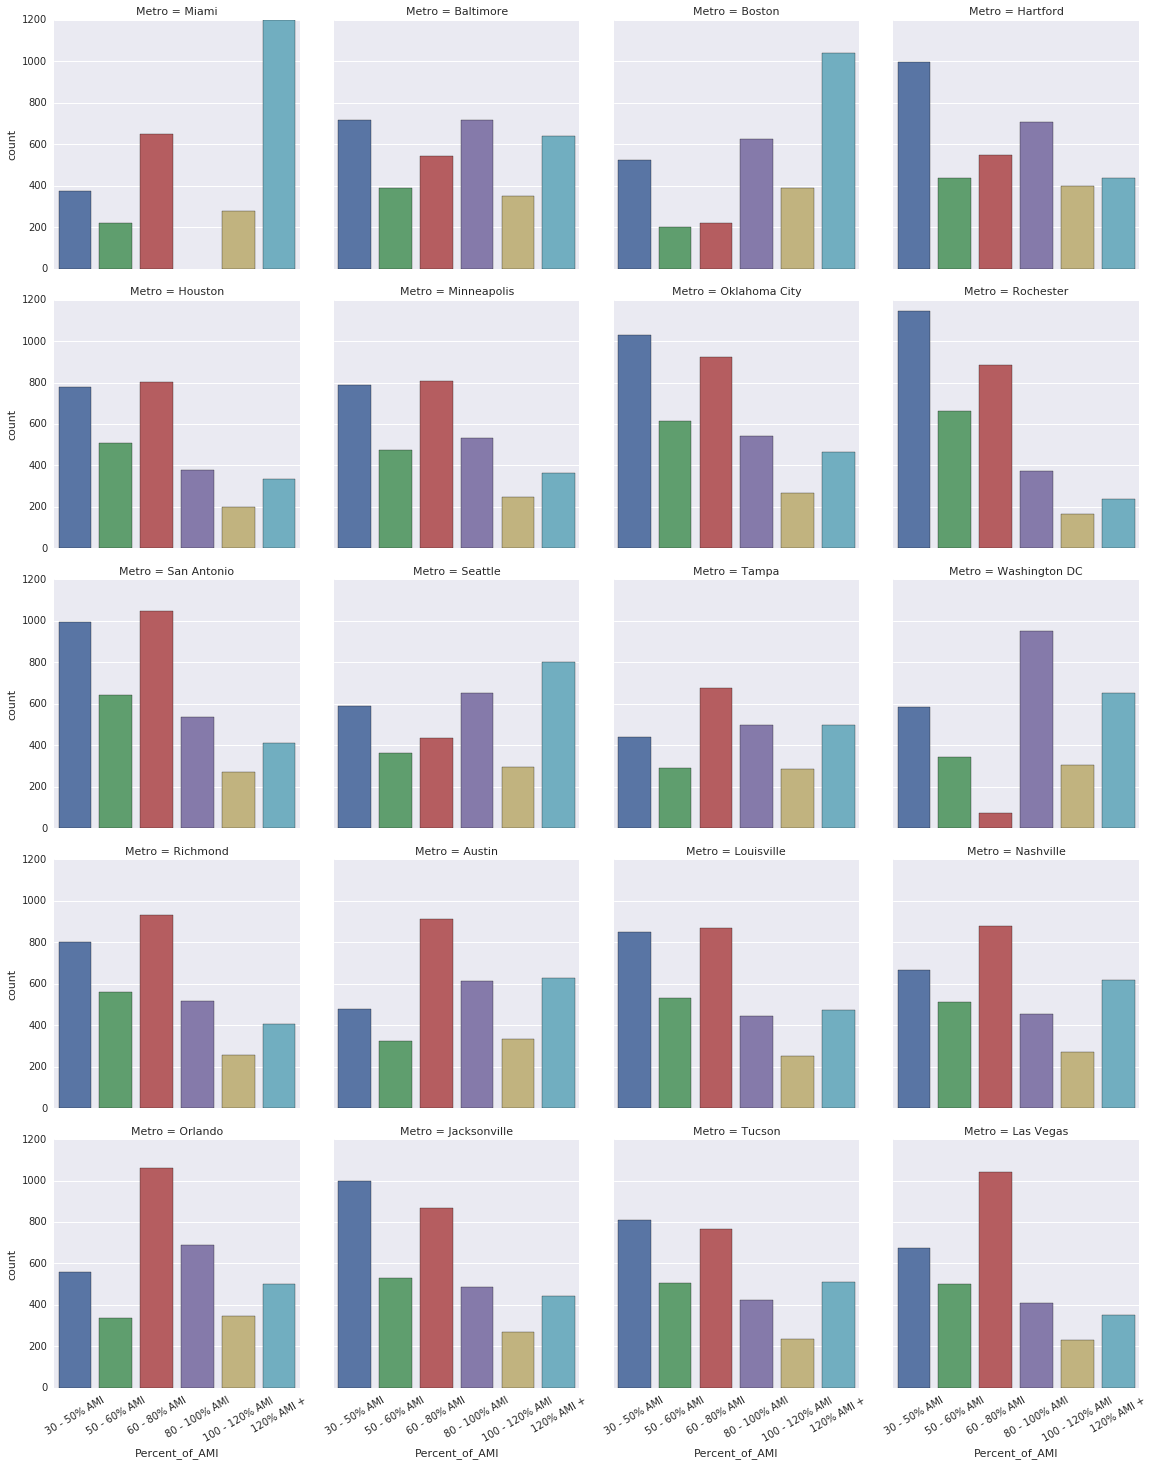

In [23]:
                             
g = sns.factorplot(x="Percent_of_AMI", col="Metro",col_wrap = 4,
                  data=df2, kind="count", x_order = ['30 - 50% AMI','50 - 60% AMI', '60 - 80% AMI', '80 - 100% AMI', '100 - 120% AMI', '120% AMI +'],
                 size=4, aspect=1)

g.set_xticklabels(rotation=30)
plt.show()